In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [12]:
df = pd.read_csv('adult.csv', skipinitialspace=True)

In [14]:
df.columns = df.columns.str.strip()
df.replace('?', np.nan, inplace=True)
available_cols = [col for col in ['workclass', 'occupation', 'native-country'] if col in df.columns]
for col in available_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
education_map = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']
df['education'] = df['education'].replace(education_map, 'School')

In [16]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      4976
           1       0.51      0.75      0.61      1537

    accuracy                           0.77      6513
   macro avg       0.71      0.76      0.72      6513
weighted avg       0.82      0.77      0.78      6513



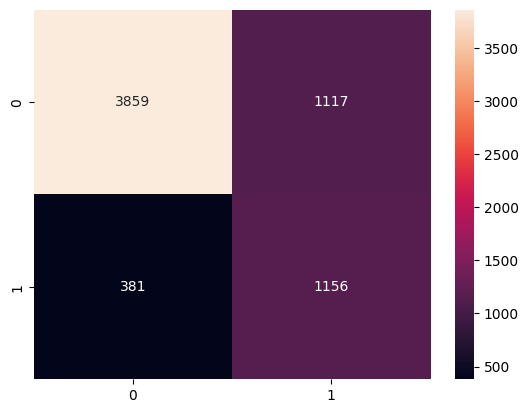

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()